### Step 1. Open the data file & Feature Preperation

Begin by importing required libraries and the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# first csv file
try:
    df0 = pd.read_csv('../datasets/geo_data_0.csv')
    display(df0.sample(5))
except:
    print("geo_data_0 not found")

# second csv file
try:
    df1 = pd.read_csv('../datasets/geo_data_1.csv')
    display(df1.sample(5))
except:
    print("geo_data_1 not found")

# third csv file
try:
    df2 = pd.read_csv('../datasets/geo_data_2.csv')
    display(df2.sample(5))
except:
    print("geo_data2 not found")

,id,f0,f1,f2,product
28977,nqsYO,-0.067664,0.532000,2.980790,154.813679
26792,S3BTb,1.274328,-0.625101,5.691871,148.197211
20918,OIfCN,0.161900,0.307271,7.165008,169.878516
37777,bal8S,-0.730405,0.656744,6.663483,122.892482
1107,m9HVo,-0.946103,0.543358,2.003389,58.131198


,id,f0,f1,f2,product
29125,hGJdv,-9.798689,-4.113766,0.002540,3.179103
98765,yOM97,3.520172,-8.485035,3.005286,80.859783
80522,vFvjq,5.484449,-2.964904,0.007408,0.000000
24016,0Qldp,15.712697,1.467728,1.996272,53.906522
82125,0AahD,-4.886380,-10.296185,0.011072,3.179103


,id,f0,f1,f2,product
40901,5gjH6,0.146350,-0.699203,7.049601,59.584630
92746,rTrzJ,-2.628131,-1.451023,2.720425,124.663329
4003,rHsUQ,1.053729,-1.571481,0.965287,101.338653
98217,eKjoh,2.514281,-1.347757,3.500606,82.065646
18098,sUv28,0.346109,3.294394,2.748987,102.159246


The data sources contain wells information for their respective region.

In [2]:
display(df0.describe())
display(df1.describe())
display(df2.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Looking at the mean product from the regions we see that region one has the lowest mean but higher f0-f2 and region one has the highest mean output but smaller f0-f2, implying that there could be a negative correlation between the features and the product output. There is little dispersion to effect the model so I will not standardize feature data during the model training.

In [3]:
display(df0.info())
display(df1.info())
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

All the datatypes are proper. We will check for nulls and duplicates and drop the id column because it isn't relevant for the model.

In [16]:
dfs = [df0,df1,df2]

for df in dfs:
    df.drop(['id'],axis=1,inplace=True)
    print('duplicate count: ')
    display(df[df.duplicated() == True].count())

duplicate count: 


f0         0
f1         0
f2         0
product    0
dtype: int64

duplicate count: 


f0         0
f1         0
f2         0
product    0
dtype: int64

duplicate count: 


f0         0
f1         0
f2         0
product    0
dtype: int64

We found no duplicates or nulls. All features ready for the model.

### Step 2. Train and Test Model

A common ratio that I will use for splitting raw data into training and validation is 3:1. The target will be the 'Product' column because we want to predict the oil well output. This value is non-binary so we need a regression model. As per the project request we will use linear regression.

In [17]:
# function to train the model, display splits/model quality and return predictions vs. target
def split_and_train(df):
    # split data into training, validation, and testing 
    df_train, df_valid = train_test_split(df, test_size=0.25,random_state=12345)
    
    # Declare variables for the features and target of split data.
    features_train = df_train.drop(['product'], axis=1)
    target_train = df_train['product']
    features_valid = df_valid.drop(['product'], axis=1)
    target_valid = df_valid['product']

    #Scale feature data
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_valid = scaler.transform(features_valid)
    features_train = scaler.transform(features_train)
    
    # Train model
    model = LinearRegression().fit(features_train,target_train)
    predicted_valid = pd.Series(model.predict(features_valid))
    mse = mean_squared_error(target_valid, predicted_valid)
    print("Average volume of predicted reserves: {:.2f}".format(predicted_valid.mean()))
    print("RMSE of model: {:.2f}".format(mse**0.5))
    
    # Return model predictions and target for further analysis
    target_valid.reset_index(drop=True, inplace=True)
    predicted_valid.reset_index(drop=True, inplace=True)
    predicted = pd.concat([predicted_valid, target_valid], axis=1)
    predicted.columns = ['predicted', 'target']
    return predicted

#### Region 0

In [18]:
predictions_0 = split_and_train(df0)
predictions_0.describe()

Average volume of predicted reserves: 92.59
RMSE of model: 37.58


,predicted,target
count,25000.000000,25000.000000
mean,92.592568,92.078597
std,23.176994,44.286913
min,-9.367846,0.004022
25%,76.652232,56.059494
50%,92.661884,90.897664
75%,108.437632,128.160698
max,180.180713,185.315412


The model for region 0 predicts a very high average product from the wells in the region but the high RMSE in indicates accuracy issues with the model. This can be seen in negative product predictions (impossible).

#### Region 1

In [19]:
predictions_1 = split_and_train(df1)
predictions_1.describe()

Average volume of predicted reserves: 68.73
RMSE of model: 0.89


,predicted,target
count,25000.000000,25000.000000
mean,68.728547,68.723136
std,46.010225,46.022165
min,-1.893774,0.000000
25%,28.536661,26.953261
50%,57.851586,57.085625
75%,109.346485,107.813044
max,139.818970,137.945408


The model for region 1 has the lowest RMSE so it is the most reliable model. It also predicts the lowest average product.

#### Region 2

In [20]:
predictions_2 = split_and_train(df2)
predictions_2.describe()

Average volume of predicted reserves: 94.97
RMSE of model: 40.03


,predicted,target
count,25000.000000,25000.000000
mean,94.965046,94.884233
std,19.853733,44.902982
min,17.131597,0.000000
25%,81.388500,59.217876
50%,95.031204,94.979468
75%,108.492663,130.568416
max,165.856833,190.010982


While the model predicts that region 2 has the highest average product it also has the highest RMSE, indicating the least accuracy of the models. 

### Step 3. Prepare for Profit Calculation

First, define vars for the calculation of revenue & profit from specific wells & regions. Then compare the required output in order to make a required output for profit vs. average output of the regions.

In [21]:
BUDGET = 100000000
REVENUE_PER_UNIT = 4500
NUM_WELLS = 200
BUDGET_PER_WELL = BUDGET / NUM_WELLS
SUFFICIENT_VOL = BUDGET / NUM_WELLS / REVENUE_PER_UNIT

print("Sufficient Product Volume Threshold: {:.2f}".format(SUFFICIENT_VOL))
print("Average Predicted Volume of Reserves in Region 0: {:.2f}".format(predictions_0['predicted'].mean()))
print("Average Predicted Volume of Reserves in Region 1: {:.2f}".format(predictions_1['predicted'].mean()))
print("Average Predicted Volume of Reserves in Region 2: {:.2f}".format(predictions_2['predicted'].mean()))

Sufficient Product Volume Threshold: 111.11
Average Predicted Volume of Reserves in Region 0: 92.59
Average Predicted Volume of Reserves in Region 1: 68.73
Average Predicted Volume of Reserves in Region 2: 94.97


None of the regions have an average that exceeds the threshold to make a profit. We will need to choose the right wells in order to make a profit. 

### Step 4. Profit Calculation

First we will look at the best predicted wells across all the regions, then look at their target volume and actual profit.

In [22]:
predictions = pd.concat([predictions_0, predictions_1,predictions_2])

def mean_volume(target, predictions, count):    
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    return  selected.mean()

best_200_predicted = predictions['predicted'].sort_values(ascending=False).head(200).mean()
best_200_target = mean_volume(predictions['target'],predictions['predicted'],200)

print("Predicted Mean volume of the 200 highest producing wells = {:.2f}".format(best_200_predicted))
print("Target Mean volume of the 200 highest producing wells = {:.2f}".format(best_200_target))
PROFIT = best_200_target * NUM_WELLS * REVENUE_PER_UNIT - BUDGET
print("Profit of Top 200 predicted wells: $ {:.2f}".format(PROFIT))

Predicted Mean volume of the 200 highest producing wells = 157.11
Target Mean volume of the 200 highest producing wells = 105.54
Profit of Top 200 predicted wells: $ -5017080.98


This comparison and profit calculation shows that using the predictions from all the regions could result in choosing unprofitable wells. This could be caused by the innacurate predictions of the region 0 and 2 models. Let's examine the risks and profits in each region using bootstrapping.

### Step 5. Profit & Risk

First we will define the functions for calculating and displaying profit and risk in a region.

In [23]:
def profit(target, predictions, count):    
    predictions_sorted = predictions.sort_values(ascending=False)
    product_units = target[predictions_sorted.index][:count]
    return  (product_units.sum()*REVENUE_PER_UNIT)-BUDGET

def region_profit_risk(df):
    profits = []
    state = np.random.RandomState(12345)
    
    for i in range(1000):
        target_subsample = df['target'].sample(n=500,replace=True,random_state=state)
        predictions_subsample = df['predicted'][target_subsample.index]
        profits.append(profit(target_subsample,predictions_subsample,200))
    
    profits = pd.Series(profits)
  
    print("Average Profit :\n${:.2f}\n".format(profits.mean()))
    
    print("95% confidence interval for profit:")
    low = profits.quantile(0.025)
    high = profits.quantile(.975)
    print("${:.2f} to ${:.2f}\n".format(low,high))
    
    print("Loss Risk:")
    loss = 0
    for i in profits:
        if i < 0:
            loss += 1
    print("{:.1f}%".format(loss/len(profits)*100))
    
    profits.plot(kind="hist",figsize=(8,6),bins=20)
    plt.suptitle("")
    plt.title("Distribution of Profit")
    plt.xlabel("Profit (Million $)")

#### Region 0

Average Profit :
$4259385.27

95% confidence interval for profit:
$-1020900.95 to $9479763.53

Loss Risk:
6.0%


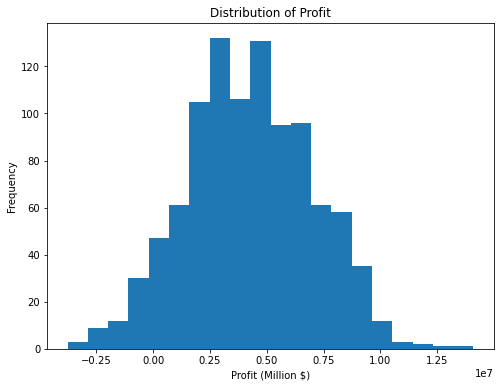

In [24]:
region_profit_risk(predictions_0)

The loss risk in region 0 is well above the 2.5% threshold. It's profits are normally distributed.

#### Region 1

Average Profit :
$5152227.73

95% confidence interval for profit:
$688732.25 to $9315475.91

Loss Risk:
1.0%


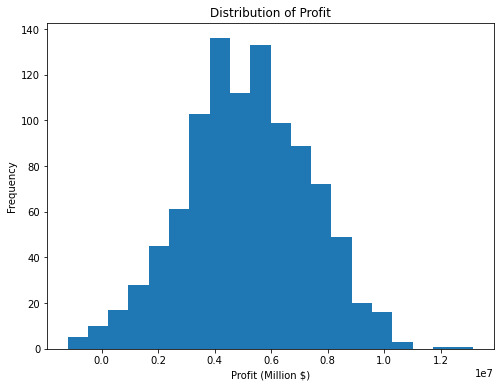

In [25]:
region_profit_risk(predictions_1)

The bootstrapped samples of region 1 profits are also normally distributed but have a much lower loss risk and higher average profit.

#### Region 2

Average Profit :
$4350083.63

95% confidence interval for profit:
$-1288805.47 to $9697069.54

Loss Risk:
6.4%


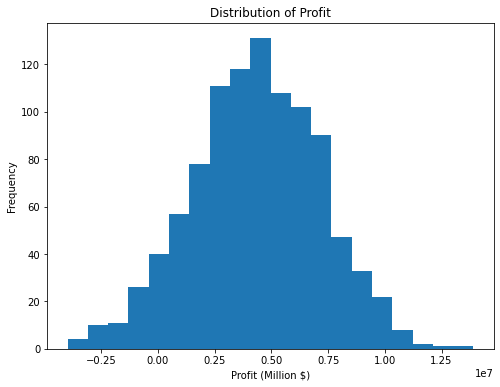

In [26]:
region_profit_risk(predictions_2)

The distribution of region 2 profits is a normal distribution. It has an average profit similar to region 0 but an even higher loss risk.

# Conclusion

As region 1's risk factor is the only to fit our criteria and it's the region with the highest average profit and has the most accurate predictive model, my recommendation would be to develop wells in region 1.